In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8778 - loss: 0.4243 - val_accuracy: 0.9650 - val_loss: 0.1143
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9674 - loss: 0.1075 - val_accuracy: 0.9676 - val_loss: 0.1079
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9783 - loss: 0.0669 - val_accuracy: 0.9727 - val_loss: 0.0892
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9842 - loss: 0.0487 - val_accuracy: 0.9749 - val_loss: 0.0819
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9880 - loss: 0.0368 - val_accuracy: 0.9703 - val_loss: 0.0920
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9905 - loss: 0.0298 - val_accuracy: 0.9766 - val_loss: 0.0792
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9920 - loss: 0.0253 - val_accuracy: 0.9723 - val_loss: 0.0990
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9936 - loss: 0.0210 

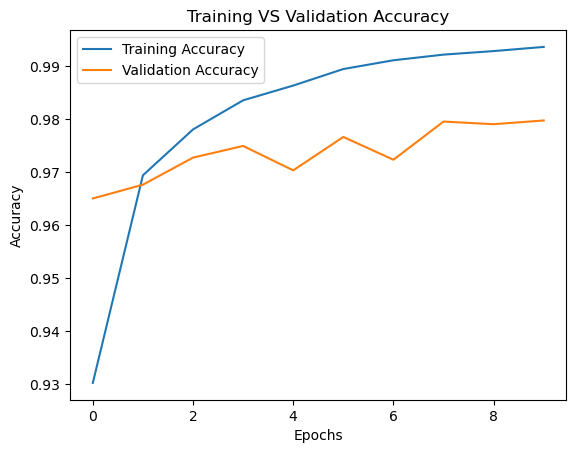

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9754 - loss: 0.1058
Loss : 8.36%
Accuracy : 97.97%


In [5]:
data_mnist = np.load('mnist.npz')
x_train, y_train = data_mnist['x_train'], data_mnist['y_train']
x_test, y_test = data_mnist['x_test'], data_mnist['y_test']

x_train, x_test = x_train.reshape(-1, 784)/255.0, x_test.reshape(-1, 784)/255.0

model =Sequential([
    Dense(128, activation ='relu', input_shape=(784,)),
    Dense(64, activation ='relu'),
    Dense(10, activation ='softmax')
])

model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics =['accuracy'])

history = model.fit(x_train, y_train, validation_data =(x_test, y_test), epochs=10, batch_size =32)

plt.plot(history.history['accuracy'], label ='Training Accuracy')
plt.plot(history.history['val_accuracy'], label ='Validation Accuracy')
plt.title('Training VS Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy = model.evaluate(x_test, y_test)
print(f"Loss :{loss*100: .2f}%")
print(f"Accuracy :{accuracy*100: .2f}%")